In [17]:
# importing pre-requisite libraries
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Get the absolute path of the credit_risk package
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(project_root)
print(project_root)


c:\Aravind's File\Projects\credit_risk


In [18]:
#importing the modules from the package
from pipeline.common_pipeline import CommonFunctions

In [19]:
common_functions = CommonFunctions()
config_ = common_functions.config_
data_path_list = common_functions.data_path_list

In [20]:
feature_data = common_functions.read_data(data_path_list['path'], data_path_list['feature_engineered_data'], 'parquet')

# Model exploration with imbalanced Dataset

In [21]:
feature_data

,Age,Credit amount,Duration,Risk,Job_1,Job_2,Job_3,Housing_own,Housing_rent,Saving accounts_little,...,Checking account_moderate,Checking account_rich,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Sex_male
0,2.766456,-0.745131,-1.236478,good,False,True,False,True,False,False,...,False,False,False,False,False,False,True,False,False,True
1,-1.191404,0.949817,2.248194,bad,False,True,False,True,False,True,...,True,False,False,False,False,False,True,False,False,False
2,1.183312,-0.416562,-0.738668,good,True,False,False,True,False,True,...,False,False,False,False,True,False,False,False,False,True
3,0.831502,1.634247,1.750384,good,False,True,False,False,False,True,...,False,False,False,False,False,True,False,False,False,True
4,1.535122,0.566664,0.256953,bad,False,True,False,False,False,True,...,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.399832,-0.544162,-0.738668,good,True,False,False,True,False,True,...,False,False,False,False,False,True,False,False,False,False
996,0.391740,0.207612,0.754763,good,False,False,True,True,False,True,...,False,False,True,False,False,False,False,False,False,True
997,0.215835,-0.874503,-0.738668,good,False,True,False,True,False,True,...,False,False,False,False,False,False,True,False,False,True
998,-1.103451,-0.505528,1.999289,bad,False,True,False,False,False,True,...,False,False,False,False,False,False,True,False,False,True


In [22]:
# Calculate percentages
target_percentage = feature_data['Risk'].value_counts(normalize=True) * 100
target_percentage

Risk
good    70.0
bad     30.0
Name: proportion, dtype: float64

We have imbalanced dataset in our data, however we build a model with this imbalanced data and check how the models will perform

In [23]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

X = feature_data.drop('Risk', axis=1)
y = feature_data['Risk']

# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Check the mapping
print("Label Mapping:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))



Label Mapping: {'bad': np.int64(0), 'good': np.int64(1)}


In [24]:
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the resulting datasets
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Target Shape:", y_train.shape)
print("Testing Target Shape:", y_test.shape)

Training Features Shape: (800, 23)
Testing Features Shape: (200, 23)
Training Target Shape: (800,)
Testing Target Shape: (200,)


In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [26]:
# Define a dictionary of models to test
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "SGD Classifier": SGDClassifier(random_state=42),
    "Ridge Classifier": RidgeClassifier(random_state=42)
}


In [27]:
results = []
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_test_pred = model.predict(X_test)

    y_train_pred = model.predict(X_train)

    # Calculate metrics
    accuracy_train = accuracy_score(y_train, y_train_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)

    # Save the results
    results.append({
        "Model": model_name,
        "Accuracy_train": accuracy_train,
        "Accuracy_test": accuracy_test,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    })

In [28]:
results_df = pd.DataFrame(results)
results_df

,Model,Accuracy_train,Accuracy_test,Precision,Recall,F1 Score
0,Logistic Regression,0.74500,0.740,0.785714,0.864286,0.823129
1,Random Forest,1.00000,0.745,0.794702,0.857143,0.824742
2,Gradient Boosting,0.88250,0.760,0.783951,0.907143,0.841060
3,AdaBoost,0.75500,0.755,0.782609,0.900000,0.837209
4,XGBoost,1.00000,0.780,0.807692,0.900000,0.851351
5,Support Vector Machine,0.79625,0.770,0.773256,0.950000,0.852564
6,Decision Tree,1.00000,0.700,0.798507,0.764286,0.781022
7,K-Nearest Neighbors,0.78750,0.695,0.736527,0.878571,0.801303
8,Naive Bayes,0.68625,0.680,0.783582,0.750000,0.766423
9,SGD Classifier,0.73500,0.725,0.745665,0.921429,0.824281


## Testing the following support vector machine, gradient boosting and xgboosting for hyper parameter tuning and finalise the model

### Model 1 Support Vector Machine

In [29]:

# hyper parameter tuning for SVM
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel types
    'gamma': [1, 0.1, 0.01, 0.001],  # Kernel coefficient
    'degree': [2, 3, 4]  # Only relevant for 'poly' kernel
}

# Initialize the SVM model
svm = SVC(random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best Parameters: {'C': 10, 'degree': 2, 'gamma': 1, 'kernel': 'linear'}
Best Cross-Validation Accuracy: 0.7324999999999999
Test Accuracy: 0.725


In [30]:
# Access all results from GridSearchCV
grid_search_results = grid_search.cv_results_

# Convert results to a DataFrame for better readability
import pandas as pd
grid_search_results_df = pd.DataFrame(grid_search_results)

# Display the top rows of the DataFrame
print("All GridSearchCV Results:")
print(grid_search_results_df.head())

# # Optional: Display specific columns for better clarity
# columns_to_display = [
#     'param_C', 'param_kernel', 'param_gamma', 'param_degree', 
#     'mean_test_score', 'std_test_score', 'rank_test_score'
# ]
print("\nSelected Results:")
print(grid_search_results_df.sort_values(by='rank_test_score'))
grid_search_results_df.to_csv('svm_grid_search_results.csv', index=False)

All GridSearchCV Results:
   mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_C  \
0       0.018408      0.003753         0.006609        0.001363      0.1   
1       0.029340      0.001875         0.020416        0.009626      0.1   
2       0.025555      0.002904         0.006194        0.000895      0.1   
3       0.019947      0.002856         0.006310        0.000248      0.1   
4       0.024864      0.001416         0.011800        0.001331      0.1   

   param_degree  param_gamma param_kernel  \
0             2          1.0       linear   
1             2          1.0          rbf   
2             2          1.0         poly   
3             2          0.1       linear   
4             2          0.1          rbf   

                                              params  split0_test_score  \
0  {'C': 0.1, 'degree': 2, 'gamma': 1, 'kernel': ...            0.74375   
1  {'C': 0.1, 'degree': 2, 'gamma': 1, 'kernel': ...            0.70000   
2  {'C': 0.1, 'degree

### Model 2 Gradient Boosting

In [31]:
# hyper parameter tuning for Gradient Boosting
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate
    'max_depth': [3, 5, 7],  # Maximum depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum samples in a leaf node
}



In [32]:
# Initialize the Gradient Boosting model
gb = GradientBoostingClassifier(random_state=42)

# Perform GridSearchCV
grid_search_gb = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search_gb.fit(X_train, y_train)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=1)

In [33]:
# Print the best parameters and best score
print("Best Parameters:", grid_search_gb.best_params_)
print("Best Cross-Validation Accuracy:", grid_search_gb.best_score_)

# Evaluate the best model on the test set
best_gb_model = grid_search_gb.best_estimator_
y_test_pred_gb = best_gb_model.predict(X_test)

# Calculate test accuracy
from sklearn.metrics import accuracy_score
test_accuracy_gb = accuracy_score(y_test, y_test_pred_gb)
print("Test Accuracy:", test_accuracy_gb)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation Accuracy: 0.75
Test Accuracy: 0.745


In [34]:
# Access all results from GridSearchCV
grid_search_results = grid_search_gb.cv_results_

# Convert results to a DataFrame for better readability
import pandas as pd
grid_search_results_df = pd.DataFrame(grid_search_results)

# Display the top rows of the DataFrame
print("All GridSearchCV Results:")
print(grid_search_results_df.head())

# # Optional: Display specific columns for better clarity
# columns_to_display = [
#     'param_C', 'param_kernel', 'param_gamma', 'param_degree', 
#     'mean_test_score', 'std_test_score', 'rank_test_score'
# ]
print("\nSelected Results:")
print(grid_search_results_df.sort_values(by='rank_test_score'))
grid_search_results_df.to_csv('gradient_boosting_grid_search_results.csv', index=False)

All GridSearchCV Results:
   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.112917      0.003854         0.002706        0.000864   
1       0.221702      0.007376         0.003013        0.000779   
2       0.440646      0.019025         0.004108        0.000377   
3       0.122081      0.016284         0.002831        0.000402   
4       0.233652      0.012080         0.004571        0.001722   

   param_learning_rate  param_max_depth  param_min_samples_leaf  \
0                 0.01                3                       1   
1                 0.01                3                       1   
2                 0.01                3                       1   
3                 0.01                3                       1   
4                 0.01                3                       1   

   param_min_samples_split  param_n_estimators  \
0                        2                  50   
1                        2                 100   
2                 

### Model 3 Xgboost

In [35]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate
    'max_depth': [3, 5, 7],  # Maximum depth of trees
    'min_child_weight': [1, 3, 5],  # Minimum sum of weights in a child node
    'subsample': [0.6, 0.8, 1.0],  # Fraction of samples used per tree
    'colsample_bytree': [0.6, 0.8, 1.0]  # Fraction of features used per tree
}

# Initialize the XGBoost model
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Perform GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search_xgb.fit(X_train, y_train)



Fitting 5 folds for each of 729 candidates, totalling 3645 fits


c:\Users\aravi\anaconda3\envs\credit_risk_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:39:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5],
                         'n_estimators': [50, 100, 200],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='accuracy', verbose=1)

In [36]:
# Print the best parameters and best score
print("Best Parameters:", grid_search_xgb.best_params_)
print("Best Cross-Validation Accuracy:", grid_search_xgb.best_score_)

# Evaluate the best model on the test set
best_xgb_model = grid_search_xgb.best_estimator_
y_test_pred_xgb = best_xgb_model.predict(X_test)

# Calculate test accuracy
from sklearn.metrics import accuracy_score
test_accuracy_xgb = accuracy_score(y_test, y_test_pred_xgb)
print("Test Accuracy:", test_accuracy_xgb)

Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 1.0}
Best Cross-Validation Accuracy: 0.74875
Test Accuracy: 0.765


As of now the Cross validation accuracy of all models stands at
        Cross Validation Accuracy| Test Acuracy
1. SVM -                73.2%    | 72.5%
2. Gradient Boosting -  75%      | 74.5%
3. Xgboost -            74.8%    | 76.5%

# Model exploration with Balanced Dataset

In [37]:
X.shape

(1000, 23)

In [38]:
y.shape

(1000,)

In [39]:
from imblearn.over_sampling import SMOTE

# Step 1: Oversample the minority class using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Step 2: Split the balanced dataset into training and testing sets
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

In [40]:
X_resampled.shape

(1400, 23)

In [41]:
# Count unique values and their occurrences
unique_values, counts = np.unique(y_resampled, return_counts=True)
counts

array([700, 700])

In [42]:
results_balanced = []
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_balanced, y_train_balanced)

    # Make predictions
    y_test_pred = model.predict(X_test_balanced)

    y_train_pred = model.predict(X_train_balanced)

    # Calculate metrics
    accuracy_train = accuracy_score(y_train_balanced, y_train_pred)
    accuracy_test = accuracy_score(y_test_balanced, y_test_pred)
    precision = precision_score(y_test_balanced, y_test_pred)
    recall = recall_score(y_test_balanced, y_test_pred)
    f1 = f1_score(y_test_balanced, y_test_pred)

    # Save the results
    results_balanced.append({
        "Model": model_name,
        "Accuracy_train": accuracy_train,
        "Accuracy_test": accuracy_test,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    })

In [43]:
results_balanced_df = pd.DataFrame(results_balanced)
results_balanced_df

,Model,Accuracy_train,Accuracy_test,Precision,Recall,F1 Score
0,Logistic Regression,0.754464,0.746429,0.759398,0.721429,0.739927
1,Random Forest,1.000000,0.800000,0.833333,0.750000,0.789474
2,Gradient Boosting,0.861607,0.767857,0.790698,0.728571,0.758364
3,AdaBoost,0.769643,0.764286,0.789062,0.721429,0.753731
4,XGBoost,1.000000,0.835714,0.861538,0.800000,0.829630
5,Support Vector Machine,0.842857,0.792857,0.825397,0.742857,0.781955
6,Decision Tree,1.000000,0.735714,0.753846,0.700000,0.725926
7,K-Nearest Neighbors,0.853571,0.775000,0.818182,0.707143,0.758621
8,Naive Bayes,0.691964,0.710714,0.697987,0.742857,0.719723
9,SGD Classifier,0.722321,0.700000,0.811111,0.521429,0.634783


In [44]:
results_df

,Model,Accuracy_train,Accuracy_test,Precision,Recall,F1 Score
0,Logistic Regression,0.74500,0.740,0.785714,0.864286,0.823129
1,Random Forest,1.00000,0.745,0.794702,0.857143,0.824742
2,Gradient Boosting,0.88250,0.760,0.783951,0.907143,0.841060
3,AdaBoost,0.75500,0.755,0.782609,0.900000,0.837209
4,XGBoost,1.00000,0.780,0.807692,0.900000,0.851351
5,Support Vector Machine,0.79625,0.770,0.773256,0.950000,0.852564
6,Decision Tree,1.00000,0.700,0.798507,0.764286,0.781022
7,K-Nearest Neighbors,0.78750,0.695,0.736527,0.878571,0.801303
8,Naive Bayes,0.68625,0.680,0.783582,0.750000,0.766423
9,SGD Classifier,0.73500,0.725,0.745665,0.921429,0.824281


1. From the results above between imbalanced and balanced datasets we can understand that model test accuracy and precision have been slightly reduced but we see good improvement in recall and this results in good f1 score.
2. Precision focuses on the quality of positive predictions and recall focuses on the quantity of positive predictions

## Testing the following support vector machine, gradient boosting and xgboosting for hyper parameter tuning and finalise the model

### Model 1 exploration with svm for balanced data

In [45]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel types
    'gamma': [1, 0.1, 0.01, 0.001],  # Kernel coefficient
    'degree': [2, 3, 4]  # Only relevant for 'poly' kernel
}

# Initialize the SVM model
svm = SVC(random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train_balanced, y_train_balanced)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test_balanced)
test_accuracy = accuracy_score(y_test_balanced, y_test_pred)
print("Test Accuracy:", test_accuracy)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best Parameters: {'C': 1, 'degree': 2, 'gamma': 1, 'kernel': 'rbf'}
Best Cross-Validation Accuracy: 0.8044642857142857
Test Accuracy: 0.8357142857142857


In [46]:
# Access all results from GridSearchCV
grid_search_results = grid_search.cv_results_

# Convert results to a DataFrame for better readability
import pandas as pd
grid_search_results_df = pd.DataFrame(grid_search_results)

# Display the top rows of the DataFrame
print("All GridSearchCV Results:")
print(grid_search_results_df.head())

# # Optional: Display specific columns for better clarity
# columns_to_display = [
#     'param_C', 'param_kernel', 'param_gamma', 'param_degree', 
#     'mean_test_score', 'std_test_score', 'rank_test_score'
# ]
print("\nSelected Results:")
print(grid_search_results_df.sort_values(by='rank_test_score'))
grid_search_results_df.to_csv('svm_balanced_grid_search_results.csv', index=False)

All GridSearchCV Results:
   mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_C  \
0       0.024325      0.006075         0.006707        0.001404      0.1   
1       0.027950      0.010016         0.019397        0.004169      0.1   
2       0.027941      0.007288         0.006042        0.001146      0.1   
3       0.024725      0.005304         0.006153        0.001155      0.1   
4       0.032253      0.010223         0.021417        0.006773      0.1   

   param_degree  param_gamma param_kernel  \
0             2          1.0       linear   
1             2          1.0          rbf   
2             2          1.0         poly   
3             2          0.1       linear   
4             2          0.1          rbf   

                                              params  split0_test_score  \
0  {'C': 0.1, 'degree': 2, 'gamma': 1, 'kernel': ...           0.669643   
1  {'C': 0.1, 'degree': 2, 'gamma': 1, 'kernel': ...           0.714286   
2  {'C': 0.1, 'degree

### Model 2 Gradient Boosting

In [47]:
# hyper parameter tuning for Gradient Boosting
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate
    'max_depth': [3, 5, 7],  # Maximum depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum samples in a leaf node
}



In [48]:
# Initialize the Gradient Boosting model
gb = GradientBoostingClassifier(random_state=42)

# Perform GridSearchCV
grid_search_gb = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search_gb.fit(X_train_balanced, y_train_balanced)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=1)

In [49]:
# Print the best parameters and best score
print("Best Parameters:", grid_search_gb.best_params_)
print("Best Cross-Validation Accuracy:", grid_search_gb.best_score_)

# Evaluate the best model on the test set
best_gb_model = grid_search_gb.best_estimator_
y_test_pred_gb = best_gb_model.predict(X_test_balanced)

# Calculate test accuracy
from sklearn.metrics import accuracy_score
test_accuracy_gb = accuracy_score(y_test_balanced, y_test_pred_gb)
print("Test Accuracy:", test_accuracy_gb)

Best Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Best Cross-Validation Accuracy: 0.7875000000000001
Test Accuracy: 0.7964285714285714


### Model 3 Xgboost

In [50]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate
    'max_depth': [3, 5, 7],  # Maximum depth of trees
    'min_child_weight': [1, 3, 5],  # Minimum sum of weights in a child node
    'subsample': [0.6, 0.8, 1.0],  # Fraction of samples used per tree
    'colsample_bytree': [0.6, 0.8, 1.0]  # Fraction of features used per tree
}

# Initialize the XGBoost model
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Perform GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search_xgb.fit(X_train_balanced, y_train_balanced)



Fitting 5 folds for each of 729 candidates, totalling 3645 fits


c:\Users\aravi\anaconda3\envs\credit_risk_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:40:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5],
                         'n_estimators': [50, 100, 200],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='accuracy', verbose=1)

In [51]:
# Print the best parameters and best score
print("Best Parameters:", grid_search_xgb.best_params_)
print("Best Cross-Validation Accuracy:", grid_search_xgb.best_score_)

# Evaluate the best model on the test set
best_xgb_model = grid_search_xgb.best_estimator_
y_test_pred_xgb = best_xgb_model.predict(X_test_balanced)

# Calculate test accuracy
from sklearn.metrics import accuracy_score
test_accuracy_xgb = accuracy_score(y_test_balanced, y_test_pred_xgb)
print("Test Accuracy:", test_accuracy_xgb)

Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.6}
Best Cross-Validation Accuracy: 0.7866071428571428
Test Accuracy: 0.8071428571428572


As of now the Cross validation accuracy of all models stands at
        Cross Validation Accuracy| Test Acuracy
1. SVM -                80.4%    | 83.5%
2. Gradient Boosting -  78.7%      | 79.6%
3. Xgboost -            78.6%    | 80.7%

# Final Summary

1. From the above analysis we can understand that balancing the datasets is very important for the model to perform well. 
2. The models are performing well on the balanced dataset. 
3. Among the models which we've explored SVM is providing better accuracy so we will be using it to build the final model

In [80]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, roc_curve, auc


In [81]:

# Initialize the SVM model with custom parameters
svm_model = SVC(
    C=1,                # Regularization parameter
    kernel='rbf',        # Kernel type ('linear', 'poly', 'rbf', 'sigmoid')
    gamma=1,           # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
    degree=2,            # Degree of the polynomial kernel (only for 'poly')
    random_state=42,     # Ensures reproducibility
    probability=True     # Enables probability estimates (useful for ROC/PR curves)
)

# Train the SVM model
svm_model.fit(X_train_balanced, y_train_balanced)

# Make predictions
y_pred = svm_model.predict(X_test_balanced)

# Evaluate the model
accuracy = accuracy_score(y_test_balanced, y_pred)
precision = precision_score(y_test_balanced, y_pred)
recall = recall_score(y_test_balanced, y_pred)
f1 = f1_score(y_test_balanced, y_pred)

# Print the evaluation metrics
print("Custom SVM Model Performance:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Custom SVM Model Performance:
Accuracy: 0.84
Precision: 0.85
Recall: 0.82
F1 Score: 0.83


In [82]:
# Generate the confusion matrix
cm = confusion_matrix(y_test_balanced, y_pred)


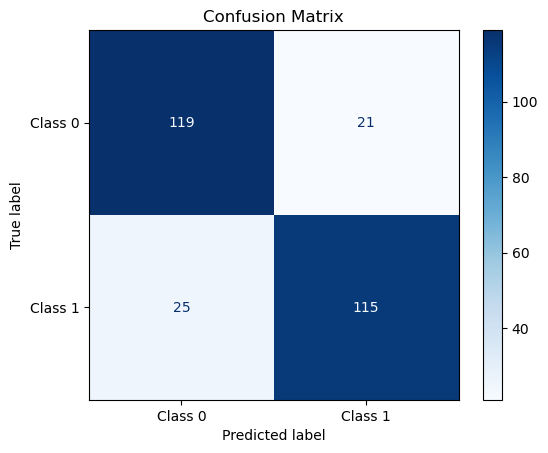

In [83]:
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [84]:
# Auc and ROC curve
# Get predicted probabilities for the positive class
y_scores = svm_model.predict_proba(X_test_balanced)[:, 1]

# Precision-Recall Curve
precision, recall, pr_thresholds = precision_recall_curve(y_test_balanced, y_scores)
pr_auc = auc(recall, precision)

# ROC Curve
fpr, tpr, roc_thresholds = roc_curve(y_test_balanced, y_scores)
roc_auc = auc(fpr, tpr)


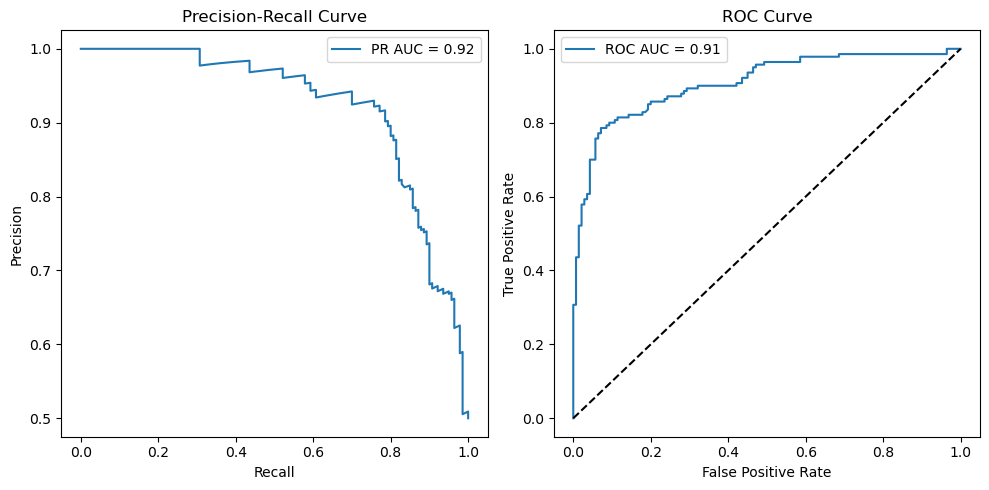

In [85]:

# Plot Precision-Recall Curve
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

# Plot ROC Curve
plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

plt.tight_layout()
plt.show()

Key Takeaways from curves:
1. PR AUC = 0.92:
The model has a good balance between precision and recall, meaning it can identify positive cases effectively while minimizing false positives.

2. ROC AUC = 0.91:
The model has a strong ability to distinguish between positive and negative classes, with a high true positive rate and a low false positive rate.


# SHAP Analysis

In [86]:
import shap
import time

In [87]:
def print_accuracy(f):
    print(f"Accuracy = {100 * np.sum(f(X_test_balanced) == y_test_balanced) / len(y_test_balanced)}%")
    time.sleep(0.5)  # to let the print get out before any progress bars


shap.initjs()

In [94]:
print_accuracy(svm_model.predict)

Accuracy = 83.57142857142857%


In [95]:
X_sample = shap.sample(X_train_balanced, 70)

In [96]:
explainer = shap.KernelExplainer(svm_model.predict_proba, X_sample)

In [97]:
X_test_sample = shap.sample(X_test_balanced, 70)  # Select a test sample for efficiency
shap_values = explainer.shap_values(X_test_sample)

  0%|          | 0/70 [00:00<?, ?it/s]

In [98]:
shap_values.shape

(70, 23, 2)

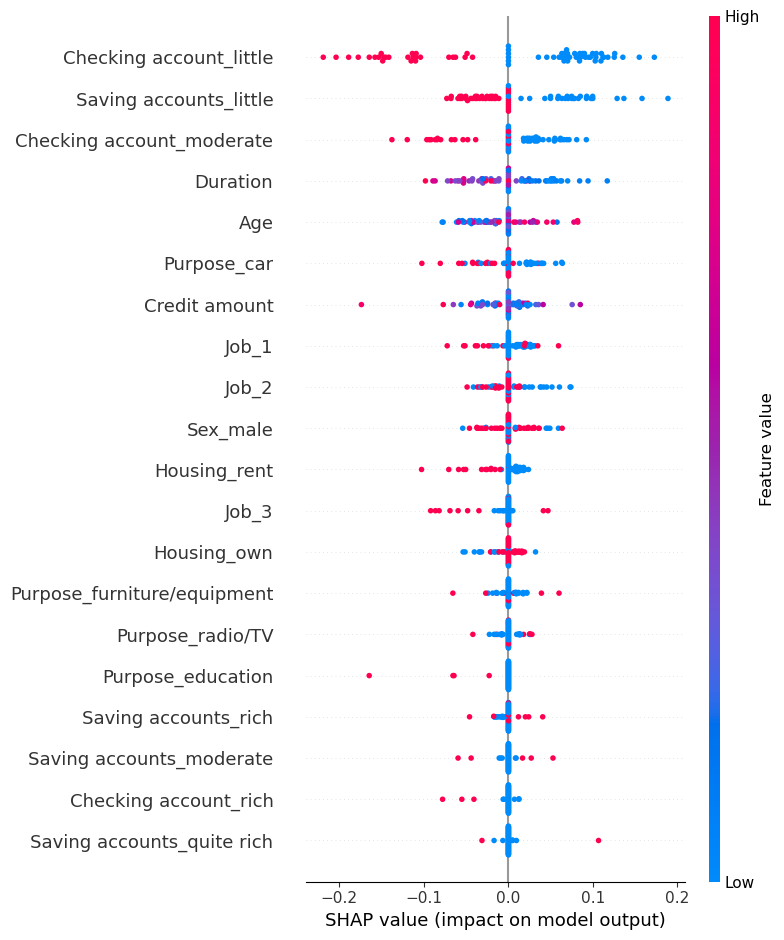

In [99]:
# Summary Plot
shap.summary_plot(shap_values[...,1], features=X_test_sample, feature_names=X_test_sample.columns)



Key Takeaways
1. The features are ranked by the importance. The most influential features are on top and least influential are at the bottom. 
2. The SHAP value represents the impact a feature has on the model's prediction.
3. Negative values decrease the probability of the positive class, while positive values increase it.
4. The colors range from blue (low feature values) to red (high feature values).
5. For example, if "Checking account_little" is red on the right side, it means that a high value of this feature increases the model's prediction probability.
6. Features with more spread-out SHAP values (longer horizontal spread) have a greater effect on model output.
7. Features like "Checking account_little" and "Saving accounts_little" appear to have a strong impact.
8. If the points are clustered around zero, it means that feature has little impact on predictions.

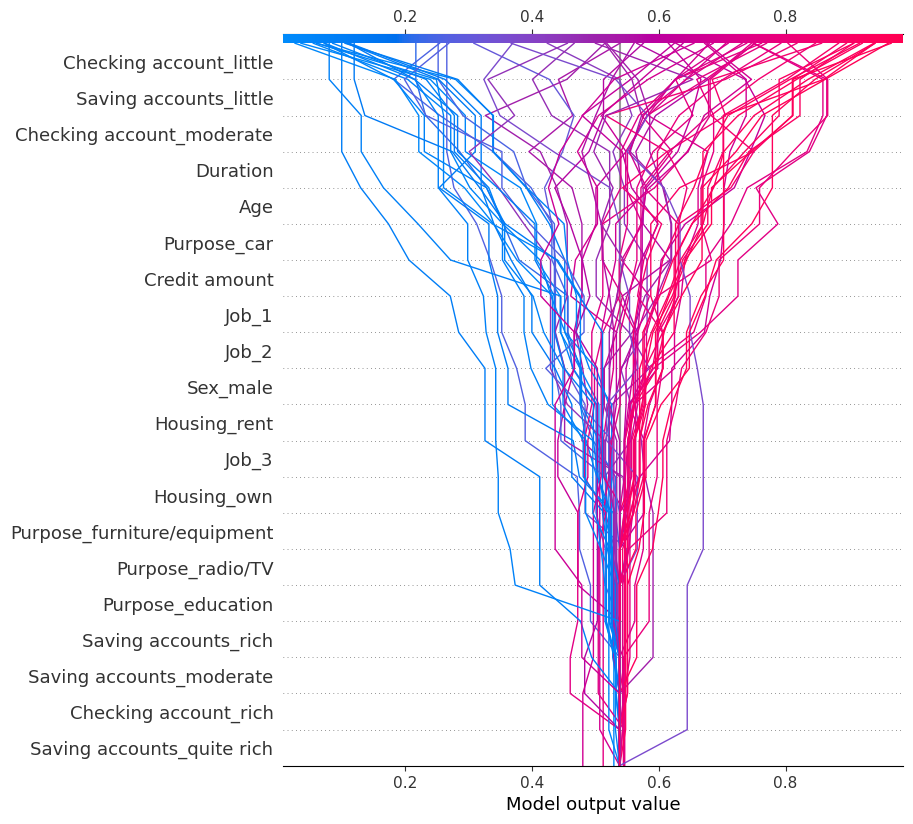

In [109]:
# Decision Plot
shap.decision_plot(explainer.expected_value[1], shap_values[...,1], X_test_sample)

plt.show()
